# Auto Encoders

- Compress input data in limited number of features
- Unsupervised learning
- Dimensionality reduction
- Few nodes in the center indicate lower-dimensional feature space
- Similarly to PCA, we should be able to accurately generate the original data

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load and normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [3]:
x_train = x_train.reshape(60000, 784)

In [4]:
# model set-up
input_img = tf.keras.layers.Input(shape=(784,))
# encoder
encoder_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(input_img)
encoder_2 = tf.keras.layers.Dense(units = 32, activation = 'sigmoid')(encoder_1)
# normalizer
norm = tf.keras.layers.LayerNormalization()(encoder_2)
# decoder
decoder_1 = tf.keras.layers.Dense(units = 128, activation = 'sigmoid')(norm)
decoder_2 = tf.keras.layers.Dense(units = 784, activation = 'sigmoid')(decoder_1) 

In [5]:
# maps input to its output (reconstructed input)
autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoder_2)
autoencoder.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics = ['mse'])
autoencoder.fit(x_train,
                x_train,
                epochs = 10,
                batch_size = 256,
                shuffle = True,
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 67us/sample - loss: 0.2608 - mse: 0.0642 - val_loss: 0.1997 - val_mse: 0.0456
Epoch 2/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1825 - mse: 0.0398 - val_loss: 0.1685 - val_mse: 0.0349
Epoch 3/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.1619 - mse: 0.0328 - val_loss: 0.1567 - val_mse: 0.0313
Epoch 4/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.1511 - mse: 0.0292 - val_loss: 0.1477 - val_mse: 0.0281
Epoch 5/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.1421 - mse: 0.0261 - val_loss: 0.1377 - val_mse: 0.0246
Epoch 6/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.1337 - mse: 0.0232 - val_loss: 0.1308 - val_mse: 0.0223
Epoch 7/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1275 - mse: 0.0212 - val_loss: 0.

### The big test

In [71]:
# adjusting dim
test_2d = test.reshape((test.shape[0], -1)); test_2d.shape

(10000, 784)

In [70]:
# prediction
result = autoencoder.predict(test_2d)

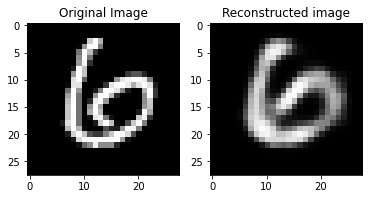

In [72]:
# plotting original vs reconstructed
index = 11
_, ax = plt.subplots(1,2)
ax[0].imshow(x_test[index], cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(result[index,:].reshape((28,28)), cmap = 'gray') # the reconstruction of the model
ax[1].title.set_text('Reconstructed image')

### What happens with random noise?

In [73]:
# generate random vector
new_input = np.random.rand(1,28*28)

In [74]:
# model prediction
new_pred = autoencoder.predict(new_input)

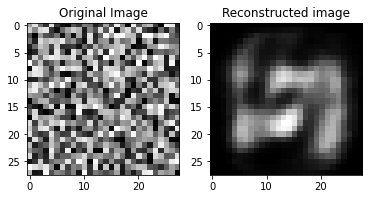

In [75]:
_, ax = plt.subplots(1,2)
ax[0].imshow(new_input.reshape((28,28)), cmap='gray') # the original image
ax[0].title.set_text('Original Image')
ax[1].imshow(result_p.reshape((28,28)), cmap='gray') # the reconstruction of the model
ax[1].title.set_text('Reconstructed image')